In [40]:
import warnings
warnings.filterwarnings('ignore')

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics


In [42]:
df=pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [43]:
df.shape

(400, 5)

In [44]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [45]:
corr=df.select_dtypes(include='number').corr()


In [46]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['Gender']=encoder.fit_transform(df['Gender'])

In [47]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [48]:
df.drop(columns=['User ID'],inplace=True)
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

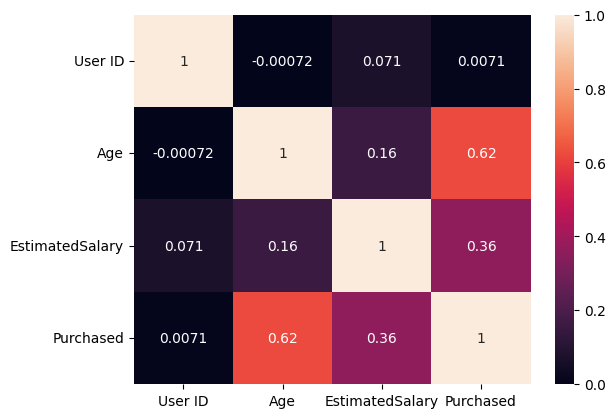

In [49]:
sns.heatmap(corr,annot=True)
plt.show()


In [50]:
# check for duplicated
df.duplicated().sum()

20

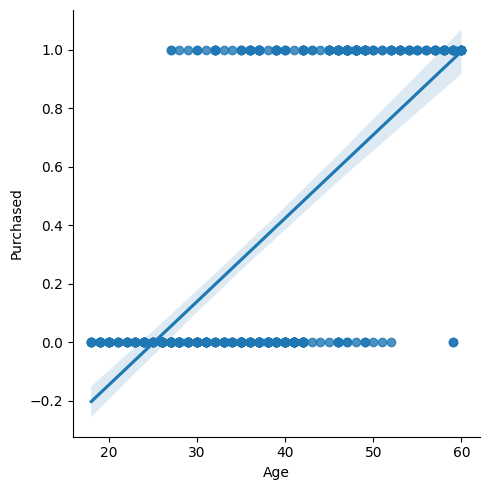

In [51]:
sns.lmplot(x='Age',y='Purchased',data=df)
plt.show()

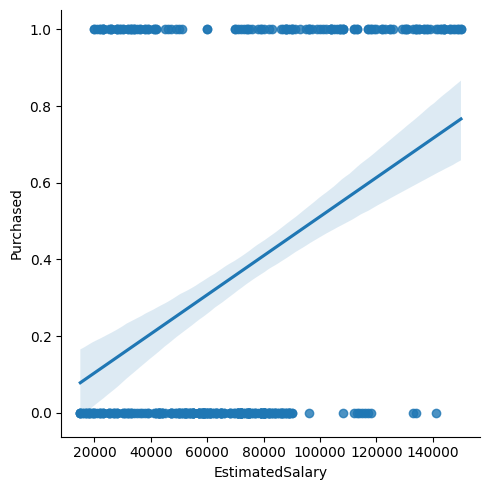

In [52]:
sns.lmplot(x='EstimatedSalary',y='Purchased',data=df)
plt.show()

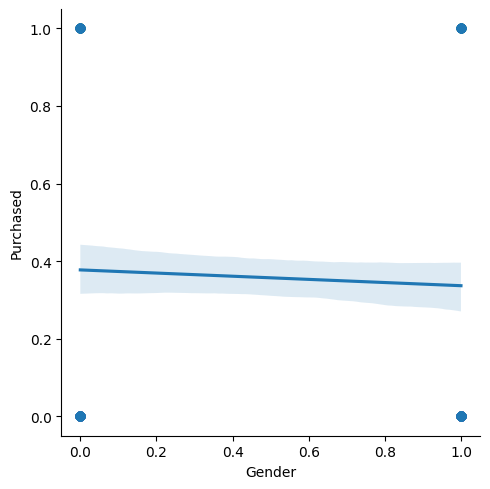

In [53]:
sns.lmplot(x='Gender',y='Purchased',data=df)
plt.show()

In [54]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [55]:
X_train.shape

(280, 3)

In [64]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)  # Note the correct spelling of 'neighbors'
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [65]:
k_pred=knn.predict(X_test)

In [66]:
knn.score(X_test,y_test)

0.8166666666666667

In [67]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,k_pred)

array([[69,  4],
       [18, 29]])

In [68]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,k_pred)

0.8166666666666667

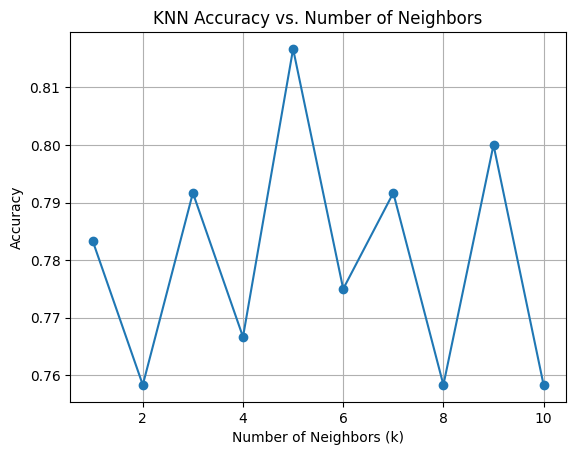

In [70]:
# check  for which n value model give good result
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

scores = []
for i in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))  # Use X_test and y_test here

plt.plot(range(1, 11), scores, marker='o')
plt.grid()
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy vs. Number of Neighbors')
plt.show()
